# Fixed Tidal with Fixed Layout with Installation Scenario Example

In [62]:
%matplotlib inline

Prepare the test data for loading. The files required can be found in the test_data directory of the source code and should be copied to the directory that the notebook is running. When the python file is run a pickle file is generated containing a dictionary of inputs.

In [63]:
%run fixed_tidal_fixed_layout_scenario.py

generate test data: D:\Usuarios\108630\Programming\Python\notebooks\fixed_tidal_fixed_layout_scenario.pkl


In [64]:
from IPython.display import display, HTML

In [65]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [66]:
import numpy as np
from datetime import datetime

In [67]:
from dtocean_core import start_logging
from dtocean_core.core import Core
from dtocean_core.menu import DataMenu, ModuleMenu, ProjectMenu, ThemeMenu
from dtocean_core.pipeline import Tree, _get_connector
from dtocean_core.extensions import StrategyManager

In [68]:
# Bring up the logger
start_logging()

2016-12-18 16:21:05,888 - INFO - dtocean_core - Begin logging for dtocean_core.


In [69]:
def html_list(x):
    message = "<ul>"
    for name in x:
        message += "<li>{}</li>".format(name)
    message += "</ul>"
    return message
def html_dict(x):
    message = "<ul>"
    for name, status in x.iteritems():
        message += "<li>{}: <b>{}</b></li>".format(name, status)
    message += "</ul>"
    return message
def html_variable(core, project, variable):
    value = variable.get_value(core, project)
    metadata = variable.get_metadata(core)
    name = metadata.title
    units = metadata.units
    message = "<b>{}:</b> {}".format(name, value)
    if units:
        message += " ({})".format(units[0])
    return message

## Create the core, menus and pipeline tree

The core object carrys all the system information and is operated on by the other classes

In [70]:
new_core = Core()
project_menu = ProjectMenu()
module_menu = ModuleMenu()
theme_menu = ThemeMenu()
data_menu = DataMenu()
pipe_tree = Tree()

## Create a new project and tree

In [71]:
project_title = "DTOcean"  
new_project = project_menu.new_project(new_core, project_title)

2016-12-18 16:21:07,384 - INFO - aneris.entity.simulation - Created new Simulation with title "Default"
2016-12-18 16:21:07,385 - INFO - aneris.control.simulation - Datastate with level "initial" stored
2016-12-18 16:21:07,388 - INFO - aneris.control.pipeline - New Hub created for interface ProjectInterface.


## Set the device type

In [72]:
options_branch = pipe_tree.get_branch(new_core, new_project, "System Type Selection")
variable_id = "device.system_type"
my_var = options_branch.get_input_variable(new_core, new_project, variable_id)
my_var.set_raw_interface(new_core, "Tidal Fixed")
my_var.read(new_core, new_project)

2016-12-18 16:21:07,410 - INFO - aneris.control.data - New "device.system_type" data stored with index MNNLAO
2016-12-18 16:21:07,411 - INFO - aneris.control.simulation - Datastate stored


## Initiate the pipeline
This step will be important when the database is incorporated into the system as it will effect the operation of the pipeline.

In [73]:
project_menu.initiate_pipeline(new_core, new_project)

2016-12-18 16:21:07,427 - INFO - aneris.control.simulation - Datastate with level "system type selection start" stored
2016-12-18 16:21:07,430 - INFO - aneris.control.data - New "hidden.pipeline_active" data stored with index 7HWLU4
2016-12-18 16:21:07,431 - INFO - aneris.control.simulation - Datastate with level "system type selection output" stored
2016-12-18 16:21:07,434 - INFO - aneris.control.pipeline - New Pipeline created for interface ModuleInterface.
2016-12-18 16:21:07,434 - INFO - aneris.control.pipeline - New Hub created for interface ThemeInterface.


## Discover available modules

In [74]:
names = module_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

## Activate some modules

Note that the order of activation is important and that we can't deactivate yet!

In [75]:
module_menu.activate(new_core, new_project, 'Hydrodynamics')
module_menu.activate(new_core, new_project, 'Electrical Sub Systems')
module_menu.activate(new_core, new_project, 'Mooring and Foundations')
module_menu.activate(new_core, new_project, 'Installation')
module_menu.activate(new_core, new_project, 'Operations and Maintenance')

## Activate the Economics themes

In [76]:
names = theme_menu.get_available(new_core, new_project)
message = html_list(names)
HTML(message)

In [77]:
theme_menu.activate(new_core, new_project, "Economics")

In [78]:
# Here we are expecting Hydrodynamics
assert _get_connector(new_project, "modules").get_current_interface_name(new_core, new_project) == "Hydrodynamics"

## Initiate the dataflow
This indicates that the filtering and module / theme selections are complete

In [79]:
project_menu.initiate_dataflow(new_core, new_project)

2016-12-18 16:21:07,828 - INFO - aneris.control.data - New "hidden.dataflow_active" data stored with index ISWTVY
2016-12-18 16:21:07,828 - INFO - aneris.control.simulation - Datastate stored
2016-12-18 16:21:07,900 - INFO - aneris.control.simulation - Datastate with level "modules initial" stored


## Create the branches assosiated to the modules

In [80]:
hydro_branch = pipe_tree.get_branch(new_core, new_project, "Hydrodynamics")
electro_branch = pipe_tree.get_branch(new_core, new_project, 'Electrical Sub Systems')
moorings_branch = pipe_tree.get_branch(new_core, new_project, 'Mooring and Foundations')
install_branch = pipe_tree.get_branch(new_core, new_project, 'Installation')
oandm_branch = pipe_tree.get_branch(new_core, new_project, 'Operations and Maintenance')
eco_branch = pipe_tree.get_branch(new_core, new_project, "Economics")

## Load test data

In [81]:
hydro_branch.read_test_data(new_core,
                            new_project,
                            "fixed_tidal_fixed_layout_scenario.pkl")

2016-12-18 16:21:10,194 - INFO - aneris.control.data - New "device.cut_in_velocity" data stored with index UTJM94
2016-12-18 16:21:10,196 - INFO - aneris.control.data - New "device.bidirection" data stored with index VA3AQC
2016-12-18 16:21:10,200 - INFO - aneris.control.data - New "farm.tidal_series" data stored with index D2S31Q
2016-12-18 16:21:10,203 - INFO - aneris.control.data - New "device.installation_depth_max" data stored with index O34G10
2016-12-18 16:21:10,206 - INFO - aneris.control.data - New "device.turbine_performance" data stored with index WC4MQ1
2016-12-18 16:21:10,207 - INFO - aneris.control.data - New "device.coordinate_system" data stored with index G4LLKJ
2016-12-18 16:21:10,209 - INFO - aneris.control.data - New "device.turbine_diameter" data stored with index 638A15
2016-12-18 16:21:10,210 - INFO - aneris.control.data - New "options.power_bin_width" data stored with index IOQ07G
2016-12-18 16:21:10,210 - INFO - aneris.control.data - New "device.minimum_distanc

In [82]:
electro_branch.read_test_data(new_core,
                              new_project,
                              "fixed_tidal_fixed_layout_scenario.pkl")

2016-12-18 16:21:12,694 - INFO - aneris.control.data - New "device.constant_power_factor" data stored with index V1I7ZU
2016-12-18 16:21:12,697 - INFO - aneris.control.data - New "component.power_quality" data stored with index ENPPV0
2016-12-18 16:21:12,806 - INFO - aneris.control.data - New "component.collection_points" data stored with index WKC3LL
2016-12-18 16:21:12,808 - INFO - aneris.control.data - New "corridor.shipping_hist" data stored with index UXCKTJ
2016-12-18 16:21:12,809 - INFO - aneris.control.data - New "component.switchgear" data stored with index 1HZO5R
2016-12-18 16:21:12,811 - INFO - aneris.control.data - New "constants.gravity" data stored with index 7W9B2R
2016-12-18 16:21:12,813 - INFO - aneris.control.data - New "component.dry_mate_connectors" data stored with index 4C05CT
2016-12-18 16:21:12,815 - INFO - aneris.control.data - New "device.voltage" data stored with index AUYDXK
2016-12-18 16:21:12,816 - INFO - aneris.control.data - New "farm.shipping_hist" data

In [83]:
moorings_branch.read_test_data(new_core,
                               new_project,
                               "fixed_tidal_fixed_layout_scenario.pkl")

2016-12-18 16:21:15,279 - INFO - aneris.control.data - New "device.foundation_location" data stored with index BDLQKT
2016-12-18 16:21:15,280 - INFO - aneris.control.data - New "farm.mean_wind_speed_100_year" data stored with index EVNSCD
2016-12-18 16:21:15,282 - INFO - aneris.control.data - New "device.system_profile" data stored with index 6UR09S
2016-12-18 16:21:15,285 - INFO - aneris.control.data - New "constants.rectangular_current_drag" data stored with index V0OAOD
2016-12-18 16:21:15,286 - INFO - aneris.control.data - New "device.dry_beam_area" data stored with index 494TPK
2016-12-18 16:21:15,289 - INFO - aneris.control.data - New "device.wet_beam_area" data stored with index BI6Y92
2016-12-18 16:21:15,290 - INFO - aneris.control.data - New "device.system_height" data stored with index B7EI8I
2016-12-18 16:21:15,292 - INFO - aneris.control.data - New "project.cost_of_concrete" data stored with index XH0I3D
2016-12-18 16:21:15,292 - INFO - aneris.control.data - New "farm.mean_

In [84]:
install_branch.read_test_data(new_core,
                               new_project,
                               "fixed_tidal_fixed_layout_scenario.pkl")

2016-12-18 16:21:17,726 - INFO - aneris.control.data - New "device.transportation_method" data stored with index 86M969
2016-12-18 16:21:17,729 - INFO - aneris.control.data - New "project.port_percentage_cost" data stored with index ZJZNQX
2016-12-18 16:21:18,289 - INFO - aneris.control.data - New "farm.wind_series_installation" data stored with index RHW7SG
2016-12-18 16:21:18,289 - INFO - aneris.control.data - New "device.disconnect_duration" data stored with index IAHNRC
2016-12-18 16:21:18,292 - INFO - aneris.control.data - New "component.ports" data stored with index G3IB7C
2016-12-18 16:21:18,776 - INFO - aneris.control.data - New "farm.tidal_series_installation" data stored with index DIE0R3
2016-12-18 16:21:18,778 - INFO - aneris.control.data - New "component.fuel_cost_rate" data stored with index POQC57
2016-12-18 16:21:18,779 - INFO - aneris.control.data - New "device.connect_duration" data stored with index WRTI5A
2016-12-18 16:21:18,779 - INFO - aneris.control.data - New "c

In [85]:
oandm_branch.read_test_data(new_core,
                            new_project,
                            "fixed_tidal_fixed_layout_scenario.pkl")

2016-12-18 16:21:21,594 - INFO - aneris.control.data - New "device.subsystem_costs" data stored with index OGOA6L
2016-12-18 16:21:21,595 - INFO - aneris.control.data - New "farm.moorings_operations_weighting" data stored with index HM6ZGW
2016-12-18 16:21:21,598 - INFO - aneris.control.data - New "device.inspections_requirements" data stored with index NVU48N
2016-12-18 16:21:21,601 - INFO - aneris.control.data - New "component.moorings_forerunner_CFR" data stored with index 33S7EC
2016-12-18 16:21:21,602 - INFO - aneris.control.data - New "farm.electrical_subsystem_lead_times" data stored with index OB7361
2016-12-18 16:21:21,605 - INFO - aneris.control.data - New "options.condition_maintenance_soh" data stored with index 4HAFHS
2016-12-18 16:21:21,605 - INFO - aneris.control.data - New "options.optim_calendar" data stored with index 8HL4LM
2016-12-18 16:21:21,608 - INFO - aneris.control.data - New "farm.number_crews_per_shift" data stored with index H3BDFI
2016-12-18 16:21:21,608 - 

## Check the status of the inputs

* satisfied - data is in the data state
* required - data is not in the data state
* unavailable - data will come from another source

In [86]:
input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [87]:
input_status = electro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [88]:
input_status = moorings_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [89]:
input_status = install_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

In [90]:
input_status = oandm_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Prepare the Economics Theme

In [91]:
theme_name = "Economics"
input_status = eco_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)
HTML(message)

## Set the discount rate and cost estimates and project lifetime

In [92]:
discount_rate = 0.05
device_cost = 1000000

new_var = eco_branch.get_input_variable(new_core, new_project,
                                        "project.discount_rate")
new_var.set_raw_interface(new_core, discount_rate)
new_var.read(new_core, new_project)

new_var = eco_branch.get_input_variable(new_core, new_project,
                                        "device.system_cost")
new_var.set_raw_interface(new_core, device_cost)
new_var.read(new_core, new_project)

2016-12-18 16:21:22,046 - INFO - aneris.control.data - New "project.discount_rate" data stored with index GLV6JW
2016-12-18 16:21:22,046 - INFO - aneris.control.simulation - Datastate stored
2016-12-18 16:21:22,137 - INFO - aneris.control.data - New "device.system_cost" data stored with index R5F5VQ
2016-12-18 16:21:22,138 - INFO - aneris.control.simulation - Datastate stored


## Check if the modules can be executed

In [93]:
can_execute = module_menu.is_executable(new_core, new_project, 'Hydrodynamics')
display(can_execute)

can_execute = module_menu.is_executable(new_core, new_project, 'Electrical Sub Systems')
display(can_execute)

input_status = hydro_branch.get_input_status(new_core, new_project)
message = html_dict(input_status)

input_status = eco_branch.get_input_status(new_core, new_project)
message += html_dict(input_status)
HTML(message)

True

False

## See what execution strategies are available

First the strategy manager in required to collect the strategy plugins.

In [94]:
strategy_manager = StrategyManager()

In [95]:
strategy_list = strategy_manager.get_available_strategies()
message = html_list(strategy_list)
HTML(message)

## Execute the Basic strategy

The "basic" strategy simply exectutes the chosen modules in sequence 

In [96]:
basic_strategy = strategy_manager.get_strategy("Basic")
basic_strategy.execute(new_core, new_project)

2016-12-18 16:21:22,259 - INFO - aneris.control.simulation - Datastate with level "hydrodynamics start" stored
No NOGO areas related to the machine depthinstallation constraints have been found.
2016-12-18 16:21:22,375 - WARNING - dtocean_hydro.input - The rated power specified (1250000.0 W) is smaller than the rated power calculated from the machine data (5758109.89324 W) This situation can lead to unexpected/unrealistic high yield.
2016-12-18 16:21:22,391 - INFO - dtocean_hydro.input - --> MACHINE INPUT SUMMARY:

{   'Clen': (18.0, None),
    'Floatflag': False,
    'InstalDepth': (-inf, -40.0),
    'MaxNumDevices': 5,
    'MinDist': (40.0, 40.0),
    'OptThreshold': 0.0,
    'RatedPowerArray': 6250000.0,
    'RatedPowerDevice': 1250000.0,
    'Type': 'Tidal',
    'UserArray': {   'Option': 2,
                     'Value': array([[ 101250.,     500.],
       [ 101750.,     500.],
       [ 101500.,    1250.],
       [ 101250.,    2000.],
       [ 101750.,    2000.]])},
    'UserOutput

## Examine the Hydrodynamics results

Currently, there is no robustness built into the core, so the assumption is that the modules executed successfully. This will have to be improved towards deployment of the final software.

Lets see what outputs are available from the Hydrodynamics module.

In [97]:
output_status = hydro_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

Let's check the number of devices and annual output of the farm, using just information in the data object.

In [98]:
hydro_branch.inspect(new_core, new_project)

2016-12-18 16:23:44,536 - INFO - dtocean_core.core - Inspecting level hydrodynamics output


In [99]:
n_devices = hydro_branch.get_output_variable(new_core, new_project, "farm.number_of_devices")
meta_data = n_devices.get_metadata(new_core)
name = meta_data.title
value = n_devices.get_value(new_core, new_project)
message_one = "<p><b>{}:</b> {}</p>".format(name, value)

farm_annual_energy = hydro_branch.get_output_variable(new_core, new_project, "farm.annual_energy")
meta_data = farm_annual_energy.get_metadata(new_core)
name = meta_data.title
value = farm_annual_energy.get_value(new_core, new_project)
units = meta_data.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

farm_device_power = hydro_branch.get_output_variable(new_core, new_project, "farm.mean_power_per_device")
meta_data = farm_device_power.get_metadata(new_core)
name = meta_data.title
value = farm_device_power.get_value(new_core, new_project)
units = meta_data.units[0]
message_three = "<p><b>{}</b> ({}):{}</p>".format(name, units, html_dict(value))

HTML(message_one + message_two + message_three)

In [100]:
layout = hydro_branch.get_output_variable(new_core, new_project, "farm.layout")
layout.get_value(new_core, new_project)

{'device001': <shapely.geometry.point.Point at 0x14a3eeb8>,
 'device002': <shapely.geometry.point.Point at 0x1d7d9b00>,
 'device003': <shapely.geometry.point.Point at 0x3a3394e0>,
 'device004': <shapely.geometry.point.Point at 0x14a3e9b0>,
 'device005': <shapely.geometry.point.Point at 0x14a3ef28>}

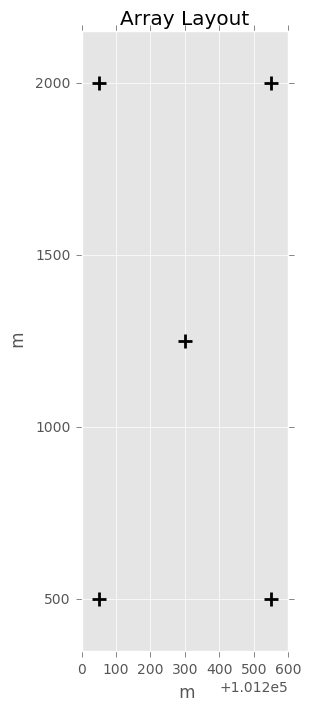

In [101]:
layout.plot(new_core, new_project)

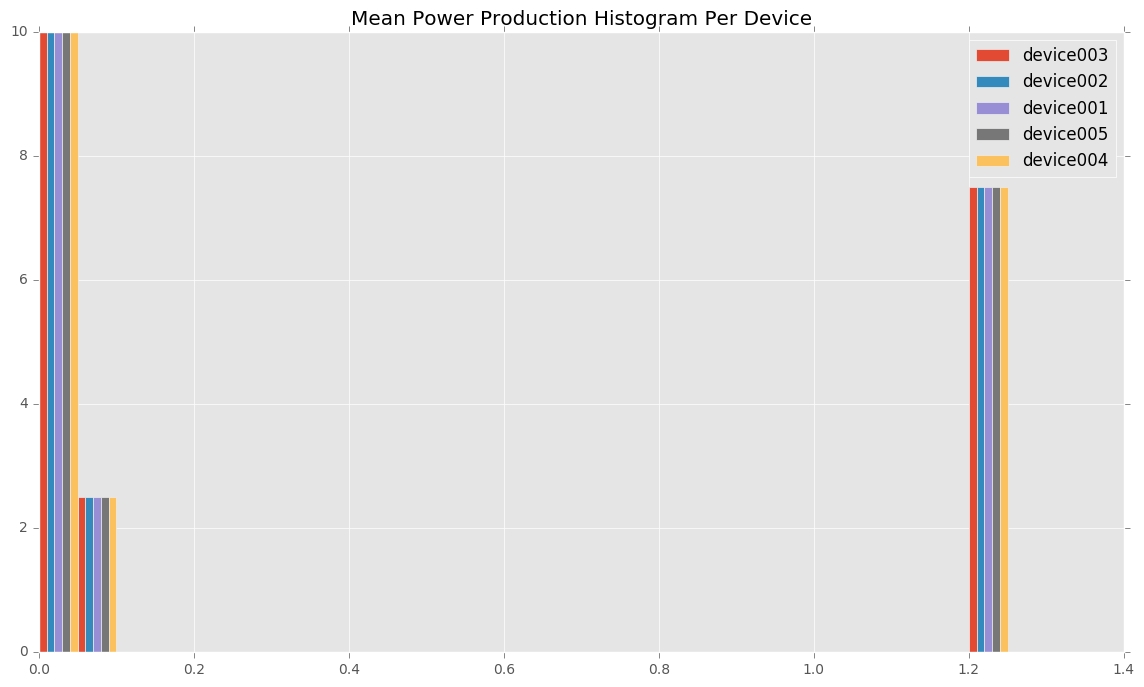

In [102]:
power_hist = electro_branch.get_input_variable(new_core, new_project, "farm.mean_power_hist_per_device")
power_hist.plot(new_core, new_project)

## Examine the Electrical Sub-systems results

Lets see what outputs are available from the modules.

In [103]:
electro_branch.inspect(new_core, new_project)

2016-12-18 16:23:45,311 - INFO - dtocean_core.core - Inspecting level electrical sub systems output


In [104]:
output_status = electro_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [105]:
farm_annual_energy = electro_branch.get_output_variable(new_core, new_project, "farm.annual_energy")
meta_data = farm_annual_energy.get_metadata(new_core)
name = meta_data.title
value = farm_annual_energy.get_value(new_core, new_project)
units = meta_data.units[0]
message_two = "<p><b>{}:</b> <i>{}</i> ({})</p>".format(name, value, units)

HTML(message_two)

In [106]:
electrical_cost = electro_branch.get_output_variable(new_core, new_project,
                                                     "farm.electrical_economics_data")
                                            
cost_data = electrical_cost.get_value(new_core, new_project)

In [107]:
cost_data

,Key Identifier,Cost,Quantity,Year
0,17.0,800.0,1400.000000,0
1,2.0,700.0,3039.949494,0
2,12.0,150000.0,3.000000,0
3,6.0,200000.0,15.000000,0
4,NaN,1000000.0,1.000000,0


In [108]:
substations = electro_branch.get_output_variable(new_core, new_project,
                                                 "farm.substation_layout")

if substations.has_value(new_core, new_project): substations.get_value(new_core, new_project)

## Examine the Mooring and Foundations results

Lets see what outputs are available from the modules.

In [109]:
moorings_branch.inspect(new_core, new_project)

2016-12-18 16:23:45,415 - INFO - dtocean_core.core - Inspecting level mooring and foundations output


In [110]:
output_status = moorings_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

## Examine the Installation results

Lets see what outputs are available from the modules.

In [111]:
install_branch.inspect(new_core, new_project)

2016-12-18 16:23:45,461 - INFO - dtocean_core.core - Inspecting level installation output


In [112]:
output_status = install_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

## Examine the Operations & Maintenance results

Lets see what outputs are available from the modules.

In [113]:
oandm_branch.inspect(new_core, new_project)

2016-12-18 16:23:45,509 - INFO - dtocean_core.core - Inspecting level operations and maintenance output


In [114]:
output_status = oandm_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [ ]:
uptime_series = oandm_branch.get_output_variable(new_core, new_project, "farm.uptime_series")
uptime_series.plot(new_core, new_project)

## Examine Economics Results

In [115]:
output_status = eco_branch.get_output_status(new_core, new_project)
message = html_dict(output_status)
HTML(message)

In [116]:
lcoe = eco_branch.get_output_variable(new_core, new_project, "project.lcoe")
lcoe_capex = eco_branch.get_output_variable(new_core, new_project, "project.capex_lcoe")
total_cost = eco_branch.get_output_variable(new_core, new_project, "project.capex_total")
opex_cost = eco_branch.get_output_variable(new_core, new_project, "project.opex_total")
discount_energy = eco_branch.get_output_variable(new_core, new_project, "project.discounted_energy")
capex_breakdown = eco_branch.get_output_variable(new_core, new_project, "project.capex_breakdown")
cost_breakdown = eco_branch.get_output_variable(new_core, new_project, "project.cost_breakdown")

In [117]:
message_lcoe = html_variable(new_core, new_project, lcoe)
message_cost = html_variable(new_core, new_project, total_cost)
message_opex = html_variable(new_core, new_project, opex_cost)
message_energy = html_variable(new_core, new_project, discount_energy)
message = "<p>{}</p><p>{}</p><p>{}</p><p>{}</p>".format(message_lcoe, message_cost, message_opex, message_energy)
HTML(message)

## Plot the balance of CAPEX costs

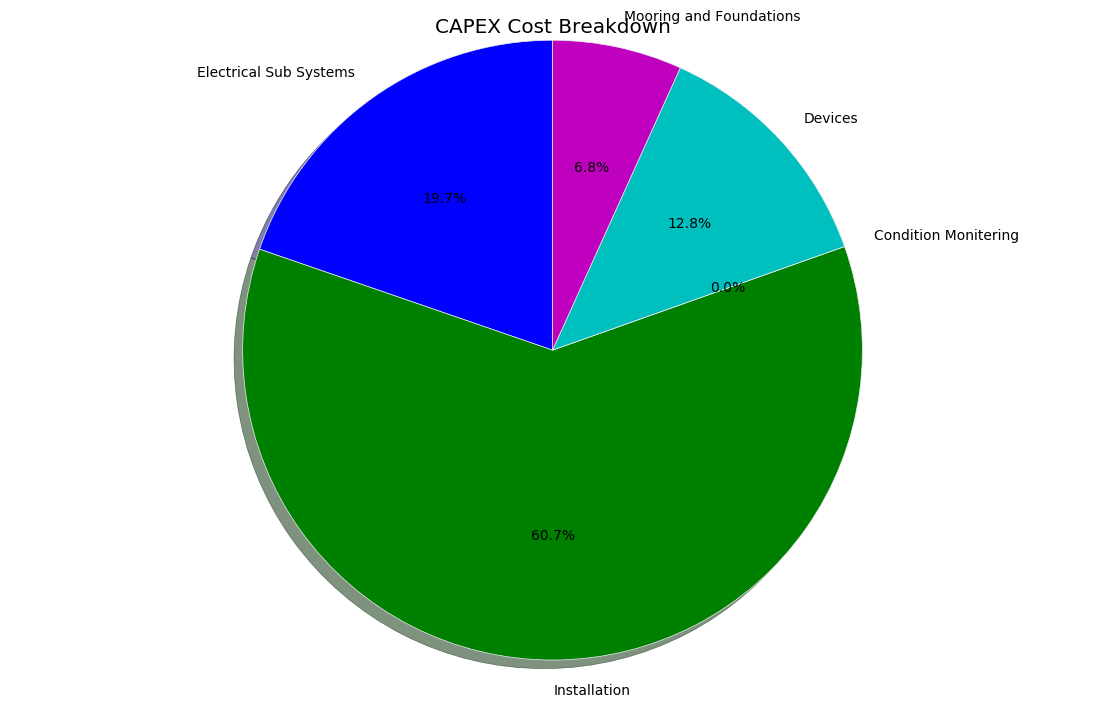

In [118]:
# The slices will be ordered and plotted counter-clockwise.
capex_breakdown.plot(new_core, new_project)

In [119]:
## Plot the balance of costs

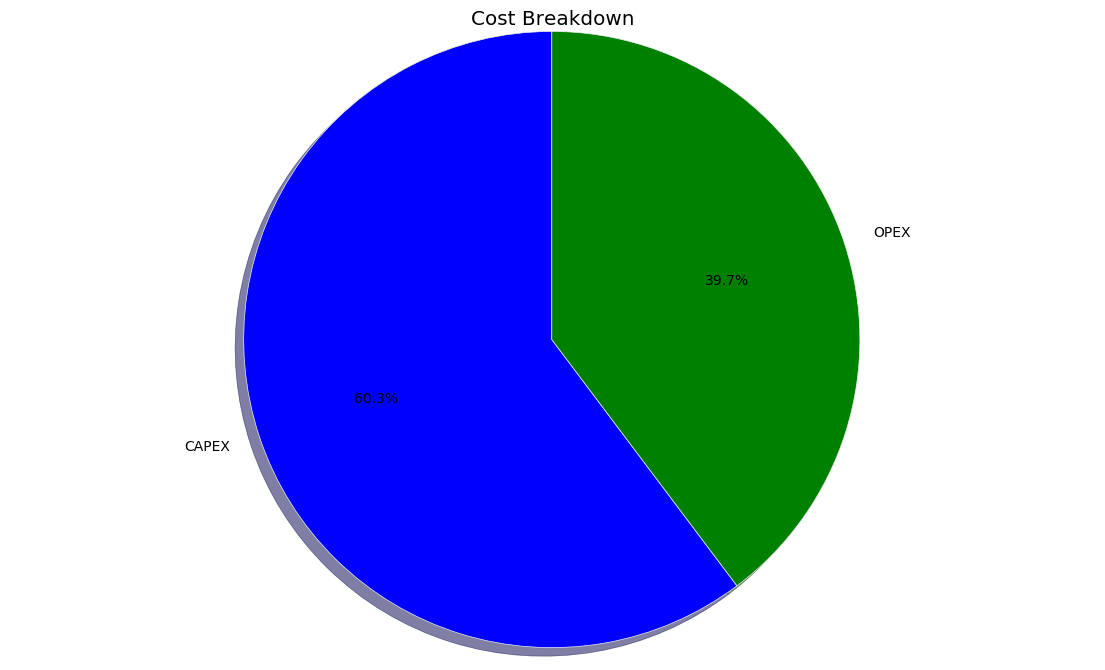

In [120]:
cost_breakdown.plot(new_core, new_project)